## Assignment 9: Data Analytics-II

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv('Social_Network_Ads.csv')

In [14]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


### Dataset Decription
Social Network Ads is a categorical dataset to determine whether a user purchased a particular product after a social media ad was given for it.

In [16]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [18]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

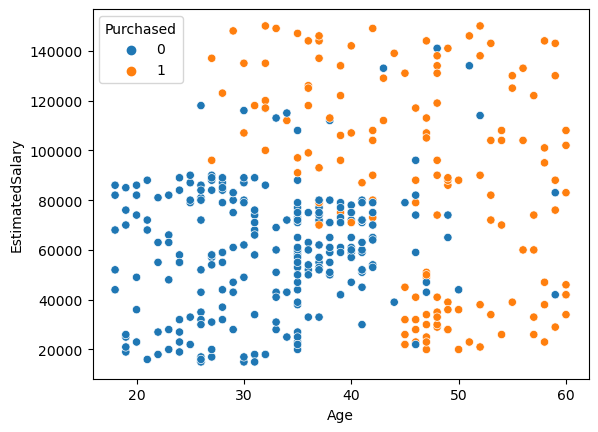

In [19]:
sns.scatterplot(data=df,x='Age',y='EstimatedSalary',hue='Purchased')

### Splitting dataset and training model
Input Columns (X): Age and Estimated Salary
    
Target Column (Y): Purchased

In [20]:
X=df.iloc[:,[2,3]].values
Y=df.iloc[:,4].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train) # Ensures that training data has mean=0 and standard deviation=1
X_test = sc.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
log_Reg=LogisticRegression(random_state=55)
log_Reg.fit(X_train,Y_train)

LogisticRegression(random_state=55)

In [32]:
Y_prediction=log_Reg.predict(X_test)

### Analysing Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_prediction)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [37]:
print("True Positives: ",cm[0][0])
print("False Positives: ",cm[0][1])
print("True Negatives: ",cm[1][0])
print("False Negatives: ",cm[1][1])

True Positives:  65
False Positives:  3
True Negatives:  8
False Negatives:  24


In [38]:
from sklearn.metrics import accuracy_score
print("Accuracy Score",accuracy_score(Y_test,Y_prediction))

Accuracy Score 0.89


In [39]:
print("Error Rate is",1-accuracy_score(Y_test,Y_prediction))

Error Rate is 0.10999999999999999


In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_prediction))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

